In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import textwrap
import os, ast, random
import pydicom


In [2]:
#Reading the CSV files
train_df = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")
localizers_df = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv")

In [3]:
display(train_df.head())

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
display(localizers_df.head())

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,"{'x': 258.3621186176837, 'y': 261.359900373599}",Other Posterior Circulation
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,"{'x': 194.87253141831238, 'y': 178.32675044883...",Right Middle Cerebral Artery
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,"{'x': 189.23979878597123, 'y': 209.19184886465...",Right Middle Cerebral Artery
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,"{'x': 208.2805049088359, 'y': 229.78962131837307}",Right Infraclinoid Internal Carotid Artery
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,"{'x': 249.86745590416498, 'y': 220.623044646393}",Anterior Communicating Artery


In [5]:
datasets = {
    "Train Labels": train_df,
    "Aneurysm Localizations": localizers_df,
}

for name, df in datasets.items():
    num_rows, num_cols = df.shape
    print(f"{name}:")
    print(f"  Number of Rows: {num_rows}")
    print(f"  Number of Columns: {num_cols}\n")

Train Labels:
  Number of Rows: 4348
  Number of Columns: 18

Aneurysm Localizations:
  Number of Rows: 2254
  Number of Columns: 4



In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SeriesInstanceUID                           4348 non-null   object
 1   PatientAge                                  4348 non-null   int64 
 2   PatientSex                                  4348 non-null   object
 3   Modality                                    4348 non-null   object
 4   Left Infraclinoid Internal Carotid Artery   4348 non-null   int64 
 5   Right Infraclinoid Internal Carotid Artery  4348 non-null   int64 
 6   Left Supraclinoid Internal Carotid Artery   4348 non-null   int64 
 7   Right Supraclinoid Internal Carotid Artery  4348 non-null   int64 
 8   Left Middle Cerebral Artery                 4348 non-null   int64 
 9   Right Middle Cerebral Artery                4348 non-null   int64 
 10  Anterior Communicating A

In [7]:
localizers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  2254 non-null   object
 1   SOPInstanceUID     2254 non-null   object
 2   coordinates        2254 non-null   object
 3   location           2254 non-null   object
dtypes: object(4)
memory usage: 70.6+ KB


**Distribution and spread of patient ages in the dataset**

/tmp/ipykernel_19/2462790514.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


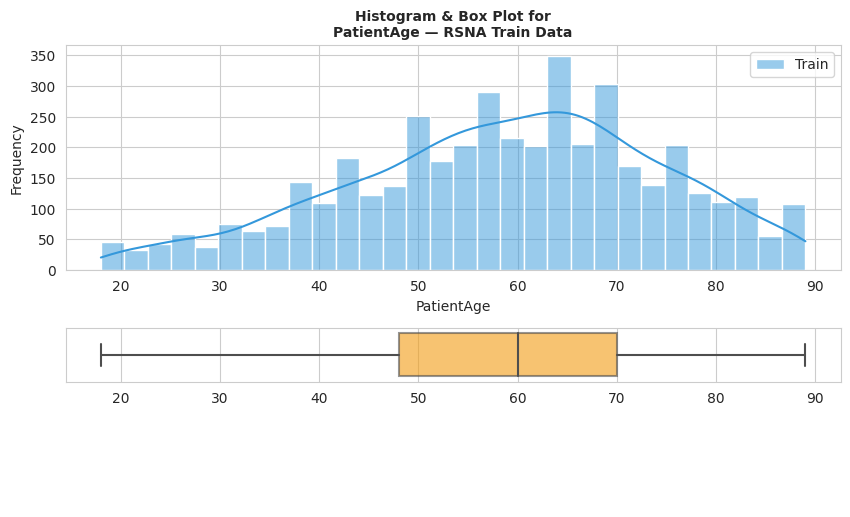

In [8]:
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

# Custom colors
hist_color = '#3498db'
box_color = '#f39c12'

# Copy and label dataset
train_rsna = train_df.copy()
train_rsna['Dataset'] = 'Train'

# Plotting function for single variable in RSNA
def plot_patient_age_distribution(data, column='PatientAge', dataset_label="RSNA Train Data"):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(
        3, 1,
        figsize=(10, 6),
        gridspec_kw={'height_ratios': [5, 1.2, 1.5], 'hspace': 0.5}
    )

    # Histogram
    ax_hist = axes[0]
    sns.histplot(data=data, x=column, kde=True, bins=30, color=hist_color, ax=ax_hist, label='Train')
    ax_hist.set_xlabel(column)
    ax_hist.set_ylabel("Frequency")
    ax_hist.set_title(
        f"Histogram & Box Plot for\n{column} — {dataset_label}",
        fontweight='bold',
        fontsize=10
    )
    ax_hist.legend()

    # Boxplot
    ax_box = axes[1]
    sns.boxplot(data=data, x=column, palette=[box_color], ax=ax_box, boxprops=dict(facecolor=box_color, alpha=0.6))
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")
    ax_box.set_title("")

    # Spacer row — turn off
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Run the plot
plot_patient_age_distribution(train_rsna)

# Cleanup
train_rsna.drop('Dataset', axis=1, inplace=True)

**Distribution of PatientSex, Modality and Aneurysm Present in dataset**

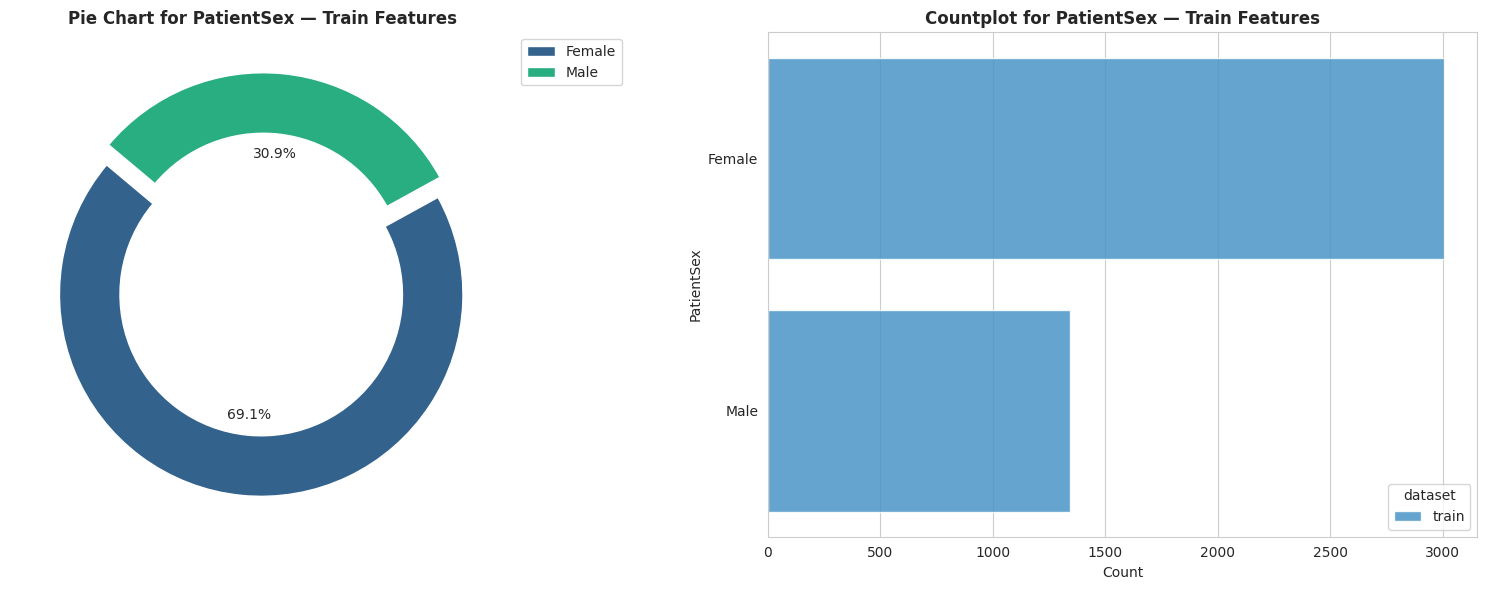

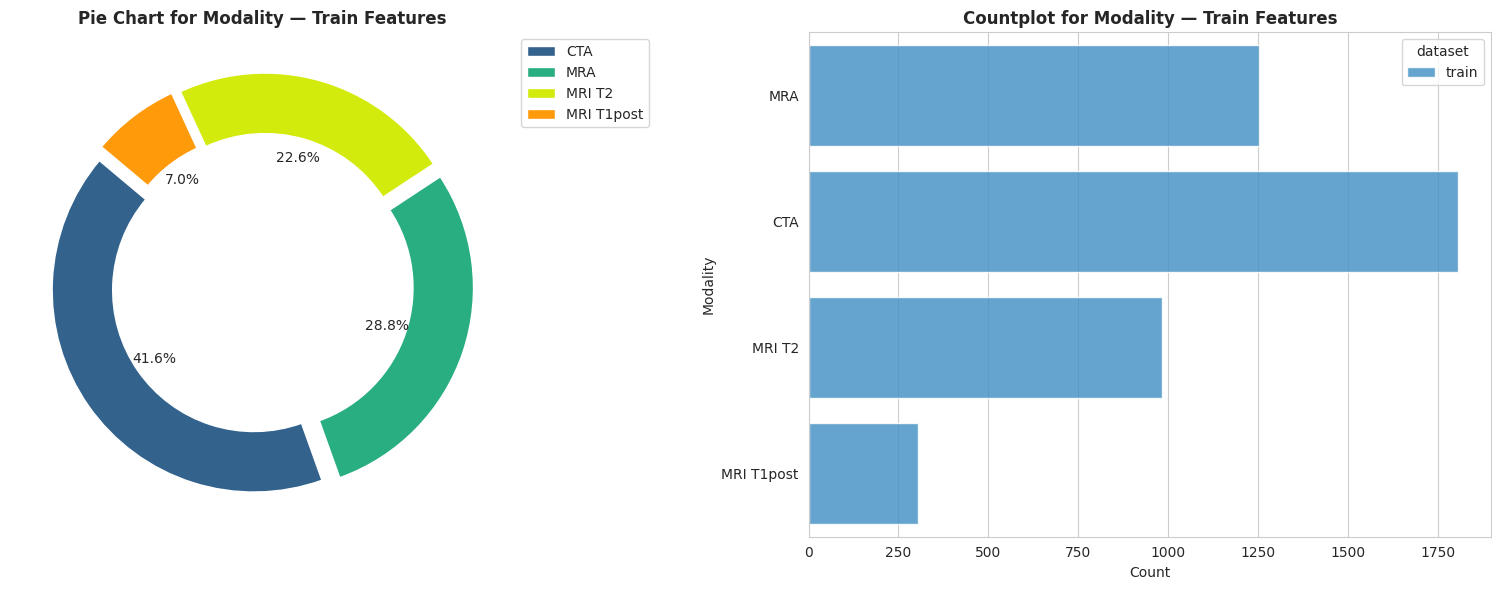

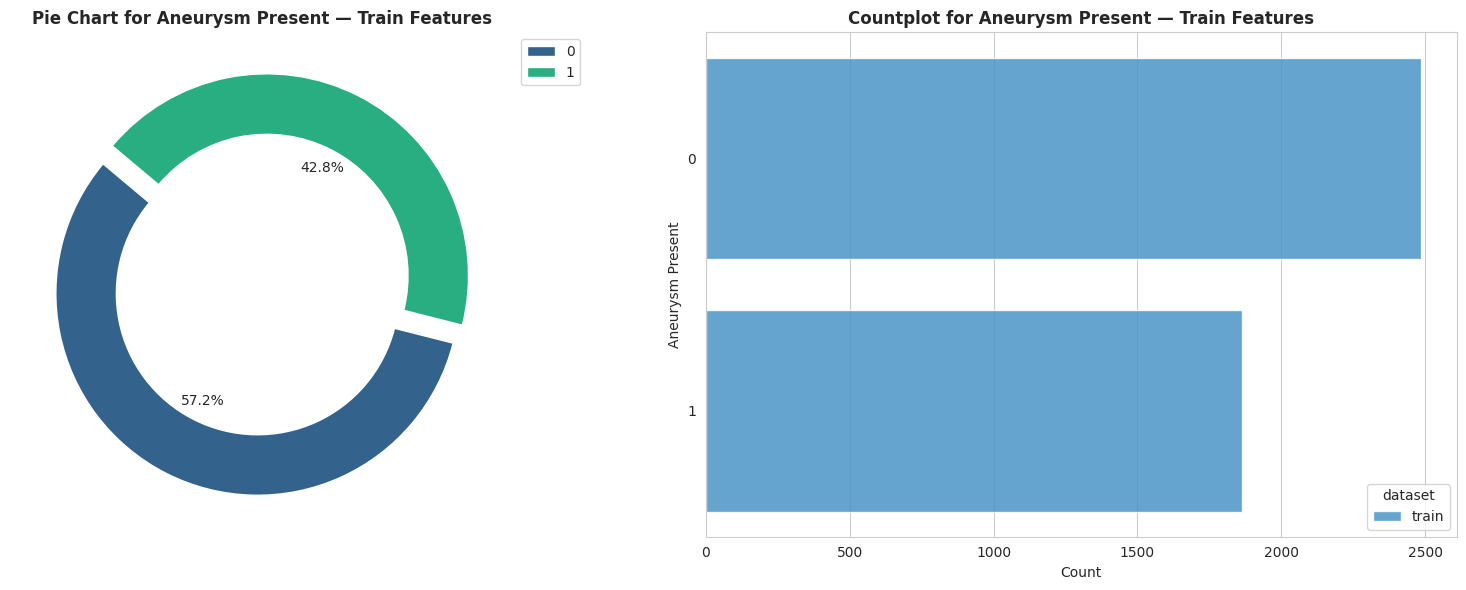

In [9]:
# Define palettes
pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779',
                     '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']
custom_palette = ['#3498db']  # Only Train

# --- Plotting function (unchanged structure)
def create_categorical_plots(variable, data, source_name):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie Chart
    plt.subplot(1, 2, 1)
    value_counts = data[variable].value_counts()

    # Collapse small categories
    threshold = 0.05 * value_counts.sum()
    filtered_values = value_counts.copy()
    filtered_values[value_counts < threshold] = 0
    filtered_values = filtered_values[filtered_values > 0]
    other_count = value_counts.sum() - filtered_values.sum()
    if other_count > 0:
        filtered_values['Other'] = other_count

    wedges, texts, autotexts = plt.pie(
        filtered_values,
        autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
        colors=pie_chart_palette[:len(filtered_values)],
        startangle=140,
        wedgeprops=dict(width=0.3),
        explode=[0.05 if p > 5 else 0 for p in filtered_values],
        textprops={'fontsize': 10}
    )

    plt.title("\n".join(textwrap.wrap(f"Pie Chart for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.legend(filtered_values.index, loc="upper left", bbox_to_anchor=(1, 1))

    # Countplot
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=data,
        y=variable,
        hue='dataset',
        palette=custom_palette,
        alpha=0.85
    )
    plt.ylabel(variable)
    plt.xlabel("Count")
    plt.title("\n".join(textwrap.wrap(f"Countplot for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.tight_layout()
    plt.show()

# --- Step 1: Prep train_df with categorical columns
train_cats = train_df.copy()
train_cats['dataset'] = 'train'

for var in ['PatientSex', 'Modality', 'Aneurysm Present']:
    create_categorical_plots(var, train_cats, "Train Features")

**Which locations in the brain are more prone to aneurysm?**


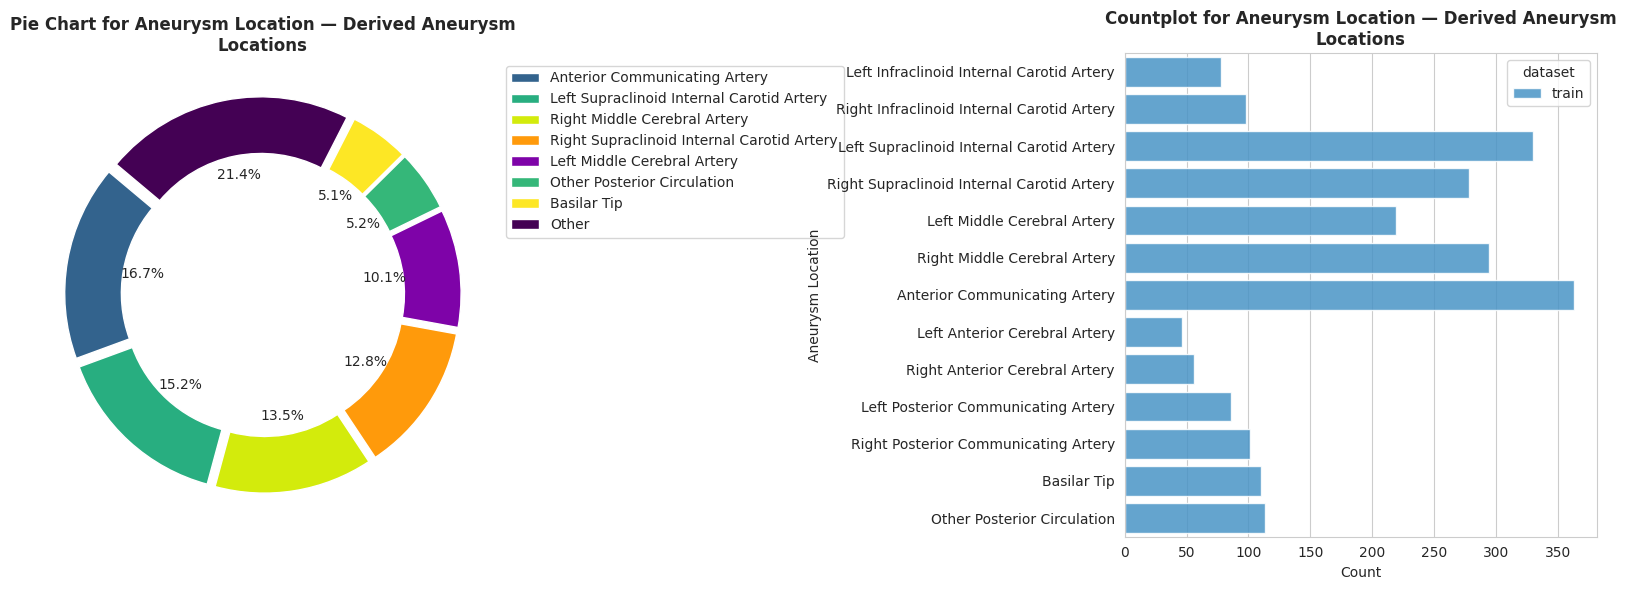

In [10]:
aneurysm_cols = [
    'Left Infraclinoid Internal Carotid Artery', 'Right Infraclinoid Internal Carotid Artery',
    'Left Supraclinoid Internal Carotid Artery', 'Right Supraclinoid Internal Carotid Artery',
    'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
    'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
    'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
    'Right Posterior Communicating Artery', 'Basilar Tip', 'Other Posterior Circulation'
]

# Create a long-form dataframe to find where aneurysm is present
aneurysm_location_df = train_df.copy()
aneurysm_location_df['dataset'] = 'train'

# Melt to long form and filter
melted = aneurysm_location_df.melt(
    id_vars=['dataset'],
    value_vars=aneurysm_cols,
    var_name='Aneurysm Location',
    value_name='Presence'
)
melted = melted[melted['Presence'] == 1]  # Only keep positive aneurysm locations

# Plot the derived aneurysm locations
create_categorical_plots('Aneurysm Location', melted, "Derived Aneurysm Locations")

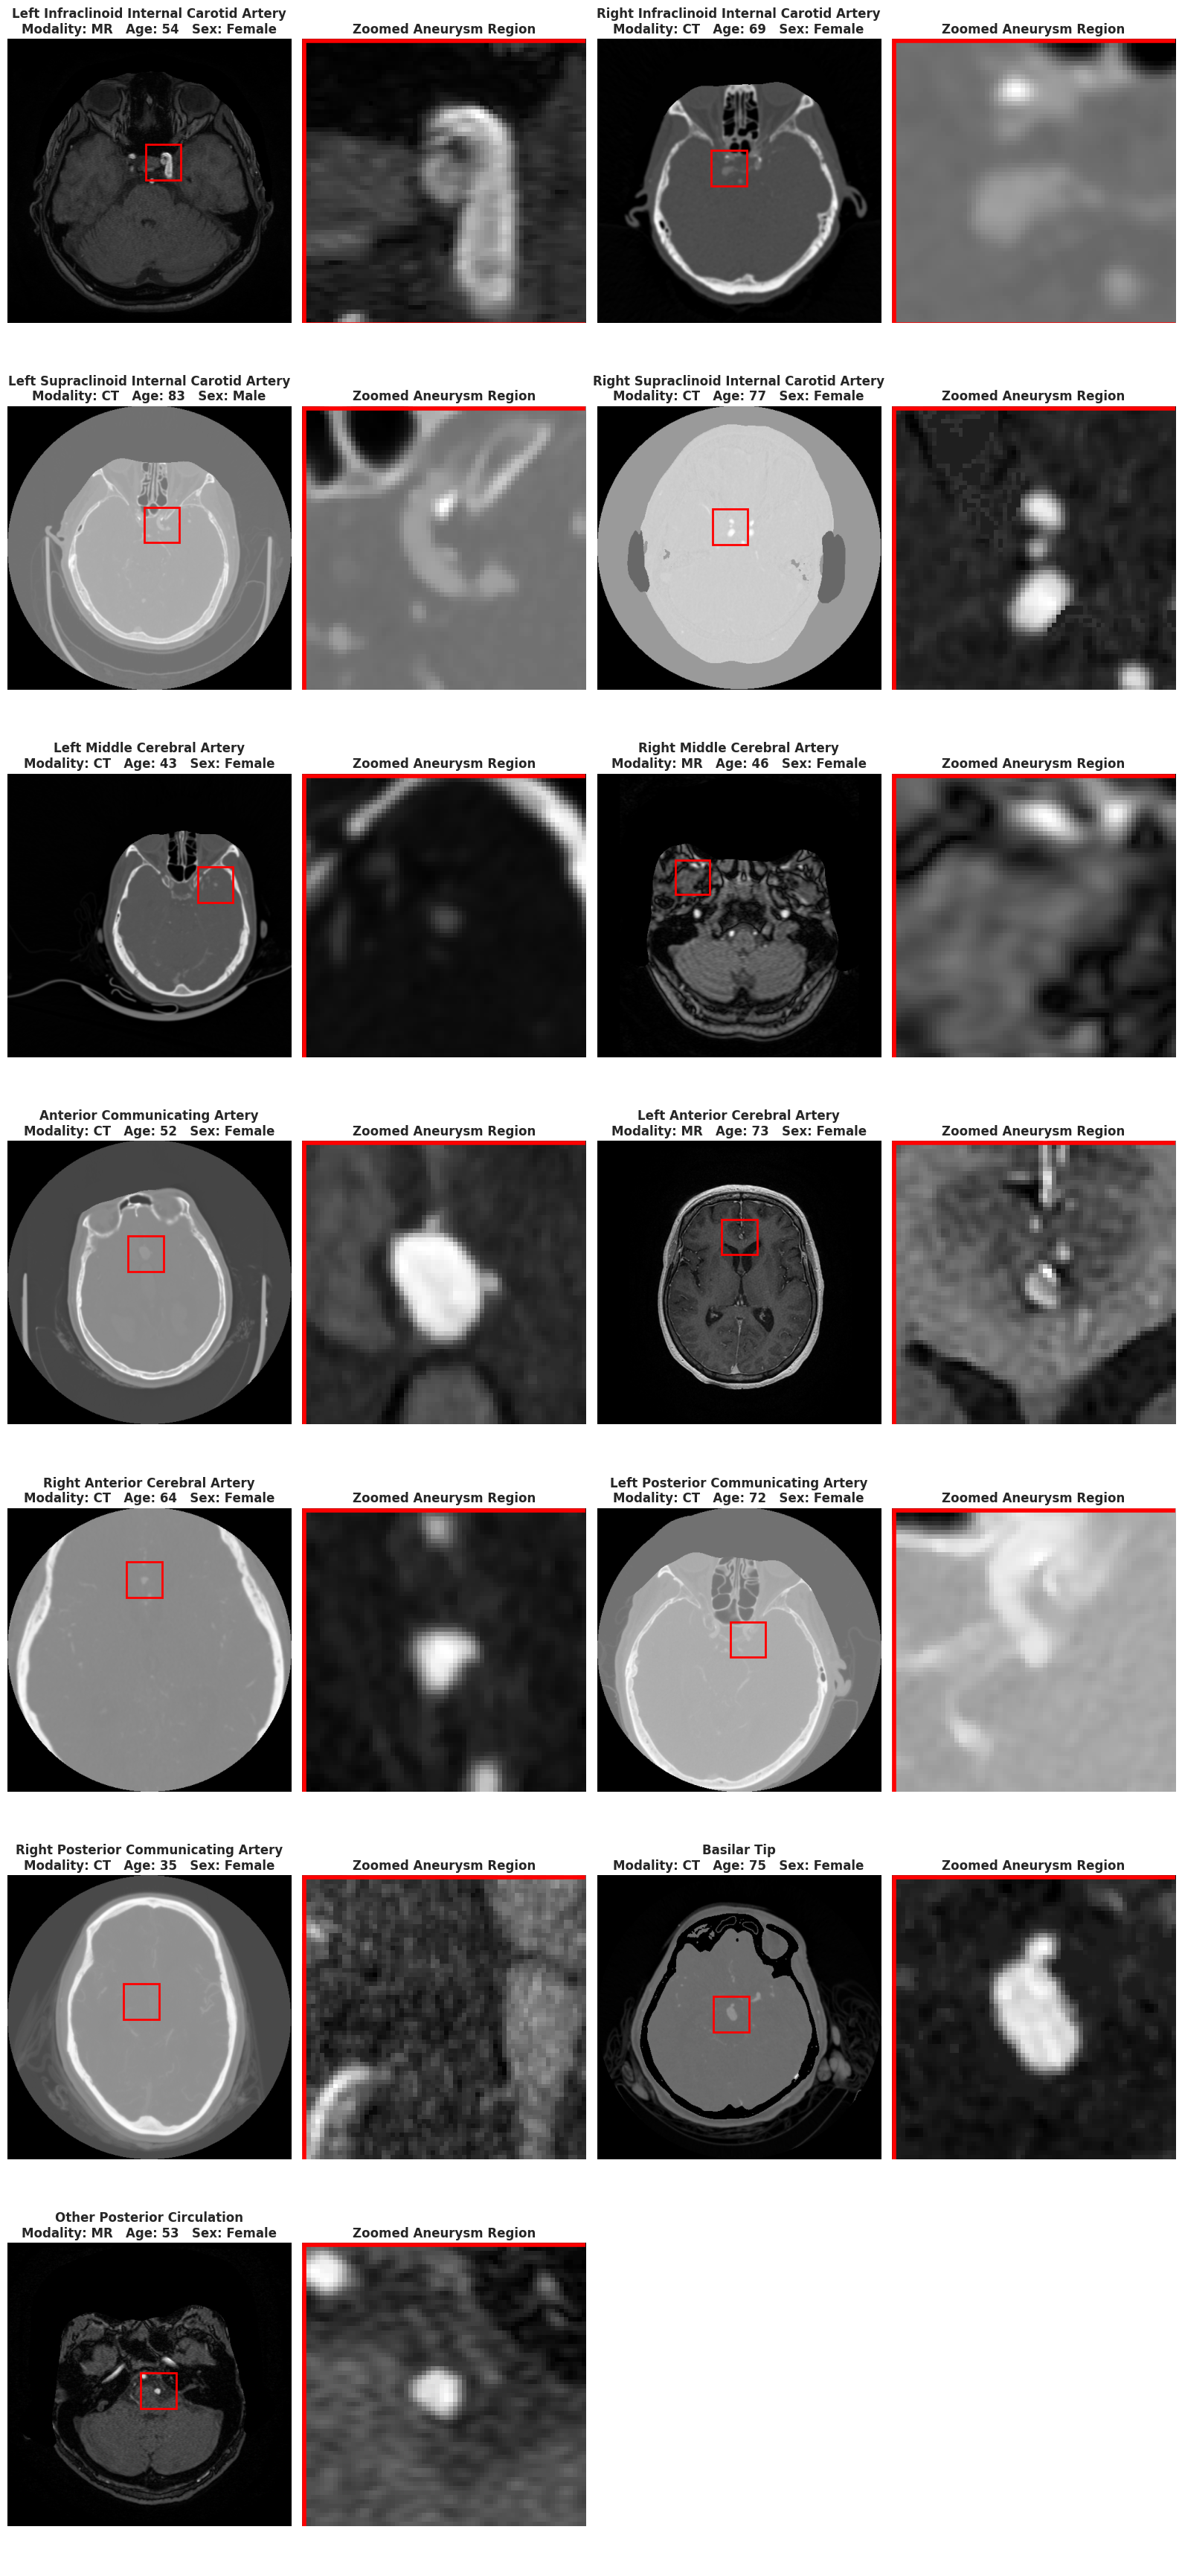

In [11]:
# Directories
dicom_dir = '/kaggle/input/rsna-intracranial-aneurysm-detection/series'

# 1) Define the 13 aneurysm location columns
aneurysm_cols = [
    'Left Infraclinoid Internal Carotid Artery', 'Right Infraclinoid Internal Carotid Artery',
    'Left Supraclinoid Internal Carotid Artery', 'Right Supraclinoid Internal Carotid Artery',
    'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
    'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
    'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
    'Right Posterior Communicating Artery', 'Basilar Tip', 'Other Posterior Circulation'
]

# 2) Pick one random valid example per region
examples = {}
for region in aneurysm_cols:
    sids = train_df.loc[train_df[region] == 1, 'SeriesInstanceUID'].unique().tolist()
    random.shuffle(sids)
    for sid in sids:
        series_path = os.path.join(dicom_dir, sid)
        if not os.path.isdir(series_path):
            continue
        loc = localizers_df[
            (localizers_df.SeriesInstanceUID == sid) &
            (localizers_df.location == region)
        ]
        if loc.empty:
            continue
        examples[region] = {
            'SeriesInstanceUID': sid,
            'localizer': loc.sample(1).iloc[0]
        }
        break

# 3) Setup grid: 2 regions per row → 4 columns
regions = list(examples.items())
n = len(regions)
rows = int(np.ceil(n / 2))

fig, axes = plt.subplots(rows, 4, figsize=(16, 5 * rows))
if rows == 1:
    axes = axes[np.newaxis, :]

for idx, (region, info) in enumerate(regions):
    row = idx // 2
    col_offset = (idx % 2) * 2

    sid     = info['SeriesInstanceUID']
    loc_row = info['localizer']
    coords  = ast.literal_eval(loc_row['coordinates'])
    x, y    = int(coords['x']), int(coords['y'])
    sop_uid = loc_row['SOPInstanceUID']

    # Metadata
    meta = train_df.loc[train_df['SeriesInstanceUID'] == sid].iloc[0]
    age, sex = meta['PatientAge'], meta['PatientSex']

    # Load slice
    files = sorted(os.listdir(os.path.join(dicom_dir, sid)))
    dcm_file = next(f for f in files if f.startswith(sop_uid))
    ds = pydicom.dcmread(os.path.join(dicom_dir, sid, dcm_file))
    img = ds.pixel_array
    if img.ndim == 3:
        img = img[0]
    modality = ds.Modality

    # Compute box
    half = 32
    xmin = max(x - half, 0)
    ymin = max(y - half, 0)
    box_w = min(2*half, img.shape[1] - xmin)
    box_h = min(2*half, img.shape[0] - ymin)

    # Full slice
    ax_full = axes[row, col_offset]
    ax_full.imshow(img, cmap='gray')
    ax_full.add_patch(Rectangle((xmin, ymin), box_w, box_h,
                                edgecolor='red', linewidth=2, fill=False))
    ax_full.set_title(
        f"{region}\nModality: {modality}   Age: {age}   Sex: {sex}",
        fontweight='bold', loc='center'
    )
    ax_full.axis('off')

    # Zoom
    zoom = img[ymin:ymin+box_h, xmin:xmin+box_w]
    ax_zoom = axes[row, col_offset + 1]
    ax_zoom.imshow(zoom, cmap='gray')
    # Ensure border is drawn last
    rect = Rectangle((0, 0), zoom.shape[1], zoom.shape[0],
                     edgecolor='red', linewidth=4, fill=False, zorder=10)
    ax_zoom.add_patch(rect)
    ax_zoom.set_title("Zoomed Aneurysm Region", fontweight='bold', loc='center')
    ax_zoom.axis('off')

# Hide any unused axes
total_plots = rows * 4
for empty_idx in range(n*2, total_plots):
    r = empty_idx // 4
    c = empty_idx % 4
    axes[r, c].axis('off')

plt.tight_layout()
plt.show()

Total positive aneurysm series: 1863


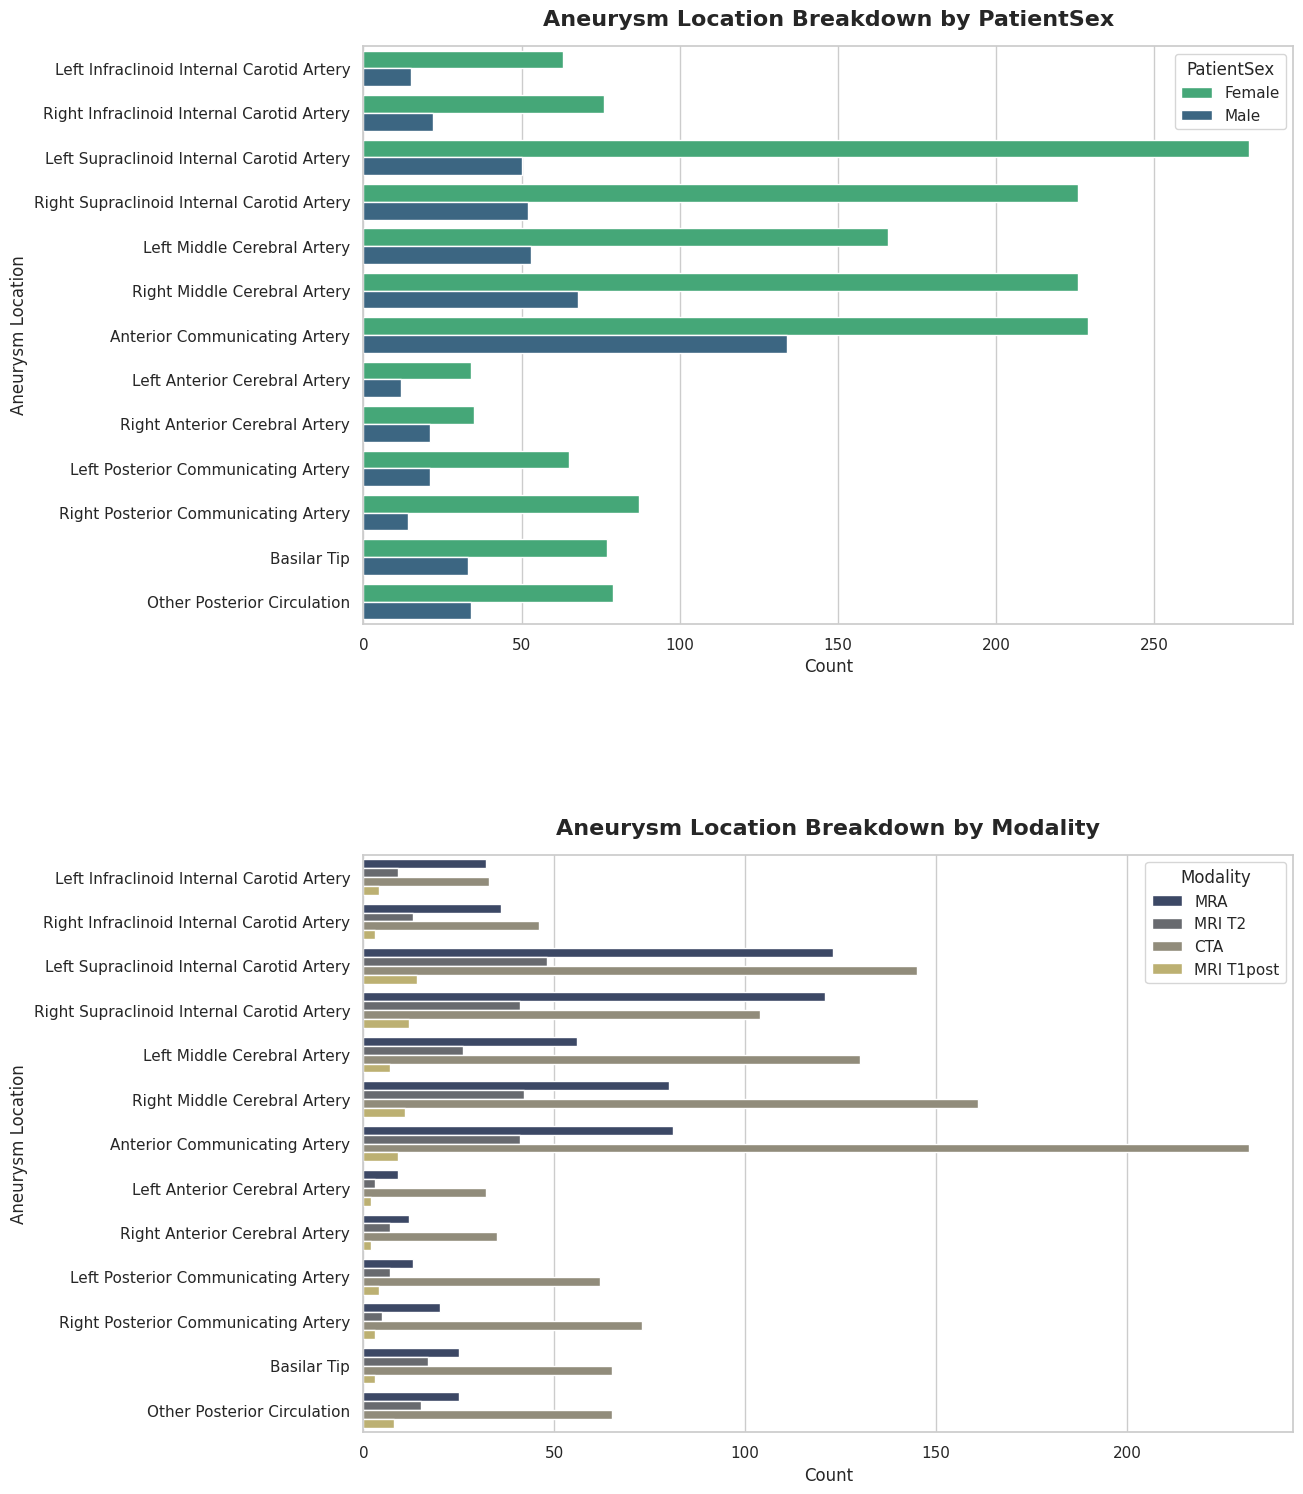

In [12]:
# --- 1. Define Data Paths ---
DATA_DIR = "/kaggle/input/rsna-intracranial-aneurysm-detection"
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")

# --- 2. Define the 13 Location Columns ---
# These are the columns we will "melt"
LOCATION_COLS = [
    'Left Infraclinoid Internal Carotid Artery',
    'Right Infraclinoid Internal Carotid Artery',
    'Left Supraclinoid Internal Carotid Artery',
    'Right Supraclinoid Internal Carotid Artery',
    'Left Middle Cerebral Artery',
    'Right Middle Cerebral Artery',
    'Anterior Communicating Artery',
    'Left Anterior Cerebral Artery',
    'Right Anterior Cerebral Artery',
    'Left Posterior Communicating Artery',
    'Right Posterior Communicating Artery',
    'Basilar Tip',
    'Other Posterior Circulation'
]

try:
    # --- 3. Load and Process Data ---
    train_df = pd.read_csv(TRAIN_CSV)
    
    # We only care about positive cases for these plots
    positive_df = train_df[train_df['Aneurysm Present'] == 1].copy()
    print(f"Total positive aneurysm series: {len(positive_df)}")

    # --- 4. Prepare Data for Plot 1 (By PatientSex) ---
    
    # 'Melt' the dataframe: turn 13 columns into one 'Aneurysm Location' column
    plot_data_sex = positive_df.melt(
        id_vars=['PatientSex'], 
        value_vars=LOCATION_COLS, 
        var_name='Aneurysm Location', 
        value_name='HasAneurysm'
    )
    
    # We only want to count the rows where 'HasAneurysm' is 1
    plot_data_sex = plot_data_sex[plot_data_sex['HasAneurysm'] == 1]
    
    # --- 5. Prepare Data for Plot 2 (By Modality) ---
    
    # 'Melt' the dataframe again, this time keeping 'Modality'
    plot_data_modality = positive_df.melt(
        id_vars=['Modality'], 
        value_vars=LOCATION_COLS, 
        var_name='Aneurysm Location', 
        value_name='HasAneurysm'
    )
    
    # We only want to count the rows where 'HasAneurysm' is 1
    plot_data_modality = plot_data_modality[plot_data_modality['HasAneurysm'] == 1]


    # --- 6. Generate the Plots ---
    
    # Set the style to match your screenshot
    sns.set(style="whitegrid")
    
    # Create two subplots, stacked vertically
    fig, axes = plt.subplots(2, 1, figsize=(12, 18))
    fig.subplots_adjust(hspace=0.4) # Add space between plots

    # --- Plot 1: Aneurysm Location Breakdown by PatientSex ---
    sns.countplot(
        y='Aneurysm Location',  # Use 'y' for horizontal bars
        hue='PatientSex',       # Group by 'PatientSex'
        data=plot_data_sex,
        ax=axes[0],
        palette='viridis_r' # A color palette similar to the screenshot
    )
    axes[0].set_title('Aneurysm Location Breakdown by PatientSex', fontsize=16, weight='bold', pad=15)
    axes[0].set_xlabel('Count', fontsize=12)
    axes[0].set_ylabel('Aneurysm Location', fontsize=12)
    axes[0].legend(title='PatientSex')
    # Make sure all labels are visible
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)


    # --- Plot 2: Aneurysm Location Breakdown by Modality ---
    sns.countplot(
        y='Aneurysm Location',  # Use 'y' for horizontal bars
        hue='Modality',         # Group by 'Modality'
        data=plot_data_modality,
        ax=axes[1],
        palette='cividis' # A different palette
    )
    axes[1].set_title('Aneurysm Location Breakdown by Modality', fontsize=16, weight='bold', pad=15)
    axes[1].set_xlabel('Count', fontsize=12)
    axes[1].set_ylabel('Aneurysm Location', fontsize=12)
    axes[1].legend(title='Modality')
    axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)
    
    plt.show()

except FileNotFoundError as e:
    print(f"ERROR: {e}")
    print("Please make sure the competition dataset 'rsna-intracranial-aneurysm-detection' is added to your notebook.")